Liniear regression atau regresi linier adalah salah satu teknik analisis yang dapat digunakan untuk memprediksi suatu variabel berdasarkan variabel lain. Regresi linier adalah metode pembelajaran mesin atau machine learning yang paling sederhana.

Regresi linier memiliki beberapa jenis, seperti
1. Regresi linier sederhana yang terdiri dari satu variabel dependent dan satu variabel independent
    contoh penggunaan regresi linier sederhana adalah
    
    - Pengaruh curah hujan terhadap hasil panen petani
    - Pengaruh jumlah pupuk yang digunakan terhadap kuantitas hasil panen cabai merah
    - Pengaruh jumlah pakan terhadap berat rata - rata pada ternak lele

2. Regresi linier berganda yang terdiri dari satu variabel dependent dan dua atau lebih variabel independent.
    contoh penggunaan regresi linear berganda adalah
    
    - Pengaruh gaji dan waktu luang terhadap index kebahagiaan manusia di usia dewasa
    - Pengaruh jumlah pupuk dan curah hujan terhadap hasil panen tanaman singkong
    - Pengaruh inflasi dan pertumbuhan upah terhadap daya beli masyarakat kelas menengah kebawah

Deskripsi data:
Data yang digunakan berbentuk tabel dengan kolom ambient temperature (AT), ambient pressure (AP), relative humidity (RH), exhaust vacuum (EV) dan electrical energy output of the plant (PE). Data diambil dari [https://www.kaggle.com/code/gauravduttakiit/power-plant-output-prediction-autoviz/data](https://www.kaggle.com/code/gauravduttakiit/power-plant-output-prediction-autoviz/data). 

Deskripsi sistem:
Sistem berikut dirancang untuk dapat memperkirakan jumlah PE berdasarkan variabel-variabel yang lain menggunakan regresi linier.

In [38]:
# Memanggil pustaka 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Membaca dataset

train = pd.read_csv("dataset/Training_set_ccpp.csv")

train.head()

,AT,EV,AP,RH,PE
0,29.95,73.42,1011.44,66.32,432.81
1,5.76,40.07,1013.22,62.99,494.67
2,29.44,64.33,1011.40,61.78,442.32
3,32.83,74.33,1011.44,50.42,427.36
4,16.86,39.63,1004.47,83.50,466.68


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      6410 non-null   float64
 1   EV      6410 non-null   float64
 2   AP      6410 non-null   float64
 3   RH      6410 non-null   float64
 4   PE      6410 non-null   float64
dtypes: float64(5)
memory usage: 250.5 KB


In [45]:

test = pd.read_csv("dataset/Testing_set_ccpp.csv")

test.head()

,AT,EV,AP,RH
0,19.64,48.06,1014.81,74.96
1,28.26,69.23,1013.01,42.10
2,27.98,67.17,1007.32,75.29
3,28.64,69.23,1013.11,37.13
4,9.34,38.08,1019.56,67.74


### Memprediksi PE berdasarkan AT

In [46]:
y = train['PE'].values.reshape(-1, 1)
X = train['AT'].values.reshape(-1, 1)

In [47]:
# Dataset train dibagi lagi menjadi training dan testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # 42 is SEED

In [48]:
#Linier regresi digunakan sebagai model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [49]:
regressor.fit(X_train, y_train)

LinearRegression()

In [50]:
inter = regressor.intercept_
print(inter) #as an intercept

[497.18060452]


In [51]:
reg = regressor.coef_
print(reg) #as a slope

[[-2.17705286]]


In [52]:
y_pred = regressor.predict(X_test)

In [53]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

      Actual   Predicted
0     432.60  427.928553
1     441.18  446.259338
2     482.99  478.414409
3     437.12  444.408843
4     487.33  485.315666
...      ...         ...
1277  452.30  451.941446
1278  446.84  450.265115
1279  470.88  468.487048
1280  467.20  467.028422
1281  446.08  450.896461

[1282 rows x 2 columns]


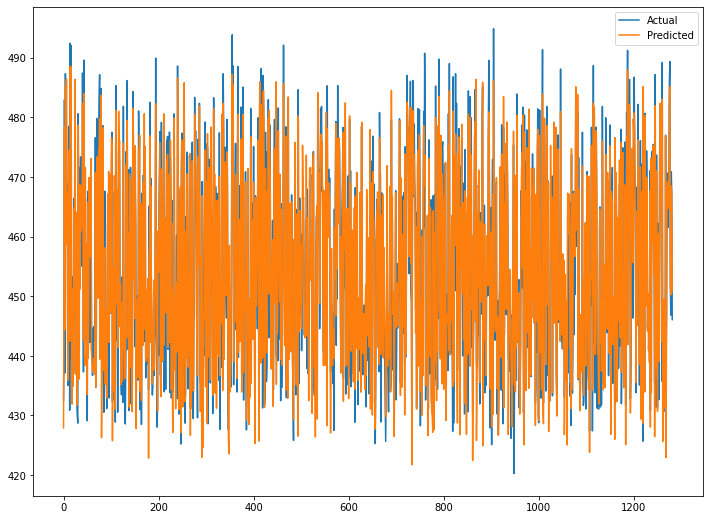

In [60]:
plt.figure(figsize=(12, 9))
plt.plot(df_preds)
plt.legend(['Actual', 'Predicted'])

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [78]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [79]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Mean absolute percentage error: {rmse:.2f}')

Mean absolute error: 3.86
Mean squared error: 24.25
Mean absolute percentage error: 4.92


### Memprediksi EP berdasarkan AT dan EV

In [68]:
y = train['PE']
X = train[['AT', 'EV']]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [70]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [71]:
regressor.intercept_

505.5877281179684

In [72]:
regressor.coef_

array([-1.71443086, -0.32229592])

In [73]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

    Coefficient value
AT          -1.714431
EV          -0.322296


In [74]:
y_pred = regressor.predict(X_test)

In [75]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

      Actual   Predicted
5093  432.60  428.529644
1044  441.18  441.798440
4827  482.99  478.027078
2905  437.12  442.017113
4994  487.33  483.661647
...      ...         ...
5247  452.30  449.811914
509   446.84  454.277014
2908  470.88  470.090024
5478  467.20  467.371774
2191  446.08  449.530444

[1282 rows x 2 columns]


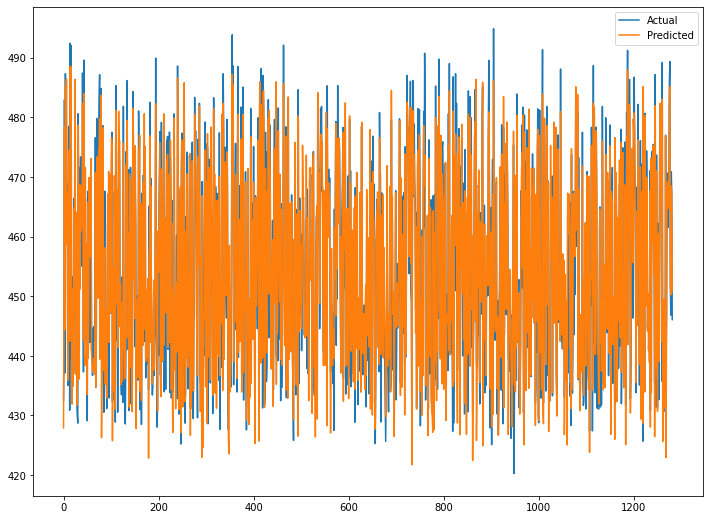

In [76]:
plt.figure(figsize=(12, 9))
plt.plot(df_preds)
plt.legend(['Actual', 'Predicted'])

In [80]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)


print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Mean absolute percentage error: {rmse:.2f}')


Mean absolute error: 3.86
Mean squared error: 24.25
Mean absolute percentage error: 4.92


In [81]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.915715396967825


In [24]:
regressor.score(X_test, y_test)

0.9157153969678249

### Predict PE based on all variables

In [82]:
y = train['PE']
X = train[['AT', 'AP', 'RH', 'EV']]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [84]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [85]:
regressor.intercept_

463.15851697563994

In [86]:
regressor.coef_

array([-2.00095157,  0.05393161, -0.16050202, -0.22694278])

In [87]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

    Coefficient value
AT          -2.000952
AP           0.053932
RH          -0.160502
EV          -0.226943


In [88]:
y_pred = regressor.predict(X_test)

In [89]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

      Actual   Predicted
5093  432.60  429.035648
1044  441.18  440.019562
4827  482.99  477.280683
2905  437.12  440.976739
4994  487.33  486.040825
...      ...         ...
5247  452.30  450.505213
509   446.84  452.697677
2908  470.88  469.382644
5478  467.20  467.892903
2191  446.08  449.084286

[1282 rows x 2 columns]


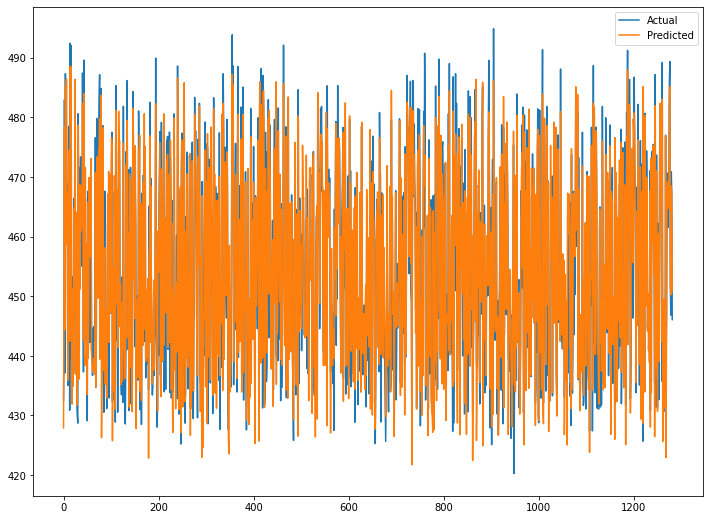

In [90]:
plt.figure(figsize=(12, 9))
plt.plot(df_preds)
plt.legend(['Actual', 'Predicted'])

In [91]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 3.58
Mean squared error: 20.49
Root mean squared error: 4.53


In [92]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.9287738984353706


In [93]:
regressor.score(X_test, y_test)

0.9287738984353705

#### Eq 1
$$ PE = {(-2.18AT) + 497.18} $$

#### Eq 1
$$ PE = {(-1.71 AT - 0.32 EV)+ 505.59} $$

#### Eq 3

$$ PE = {(-2 AT +  0.05 AP  -0.16  RH -0.23  EV) + 463.16} $$